In [16]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

In [17]:
def peaks(x,y):
    x,y = np.meshgrid(x,y)
    z = 3*(1-x)**2 * np.exp(-(x**2)-(y+1)**2) - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) - 1/3*np.exp(-(x+1)**2 - y**2) 
    return z

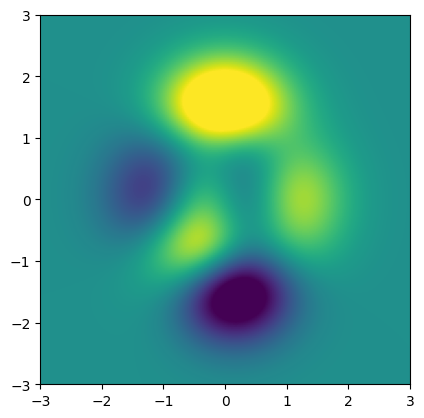

In [18]:
x = np.linspace(-3,3,201)
y = np.linspace(-3,3,201)

Z = peaks(x,y)

plt.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], vmin=-5, vmax=5, origin='lower')
plt.show()

In [19]:
sx = sym.symbols('sx')
sy = sym.symbols('sy')

sZ = 3*(1-sx)**2 * sym.exp(-(sx**2)-(sy+1)**2) - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) - 1/3*sym.exp(-(sx+1)**2 - sy**2) 

df_x = sym.lambdify((sx,sy), sym.diff(sZ, sx), 'sympy')
df_y = sym.lambdify((sx,sy), sym.diff(sZ, sy), 'sympy')

df_x(1,1).evalf()

-1.07369833656079

In [20]:
localmin = np.random.randn(2)
startpnt = localmin[:]

learning_rate = .01
train_count = 1000

trajectory = np.zeros((train_count, 2))
for i in range(train_count):
    grad = np.array([
        df_x(localmin[0], localmin[1]).evalf(),
        df_y(localmin[0], localmin[1]).evalf()    
    ])
    localmin = localmin - learning_rate * grad
    trajectory[i, :] = localmin


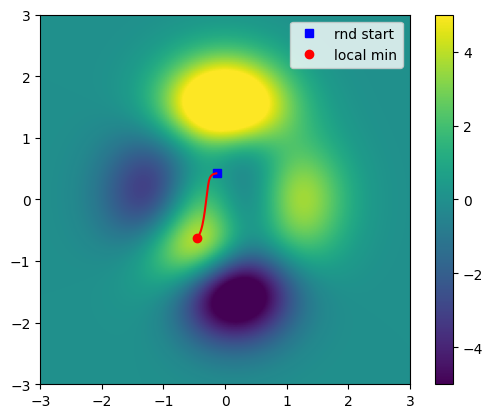

In [21]:
plt.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], vmin=-5, vmax=5, origin='lower')
plt.plot(startpnt[0], startpnt[1], 'bs')
plt.plot(localmin[0], localmin[1], 'ro')
plt.plot(trajectory[:,0], trajectory[:,1],'r')
plt.legend(['rnd start', 'local min'])
plt.colorbar()
plt.show()